In [2]:
#from tokenize import PlainToken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

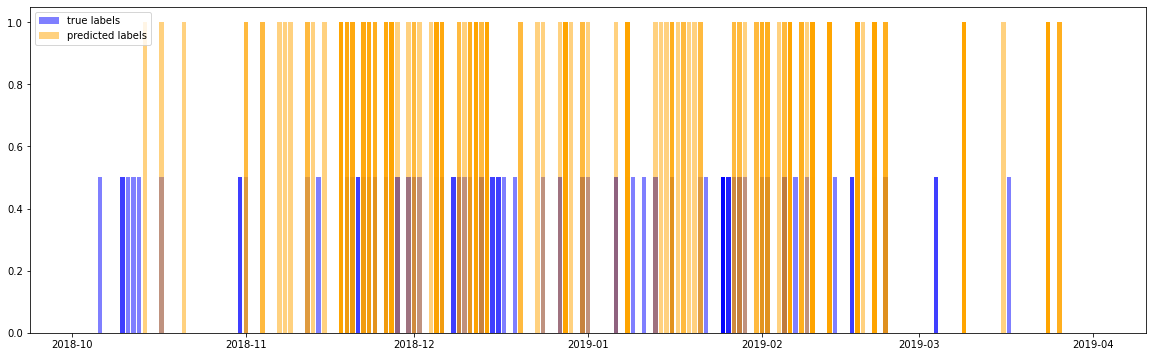

In [359]:
## get the train and predicted
results2 = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_2classes_None/resultsTEST.csv')
## get the time-series information from metadata
labels = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/testLabels.csv')
meta = results2.merge(labels, left_on="filenames", right_on="File")
results2.head()
#labels.head()
meta = meta[['filenames','trueLabels', 'predictedLabels','confidences','Weather','Date','Time','Temperature','location']]

meta['Date'] = pd.to_datetime(meta['Date'])

plot = plt.figure(figsize=(20,6))
plt.bar(meta['Date'], meta['trueLabels']*0.5, color = "blue", label='true labels', alpha =0.5)
plt.bar(meta['Date'], meta['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.legend()

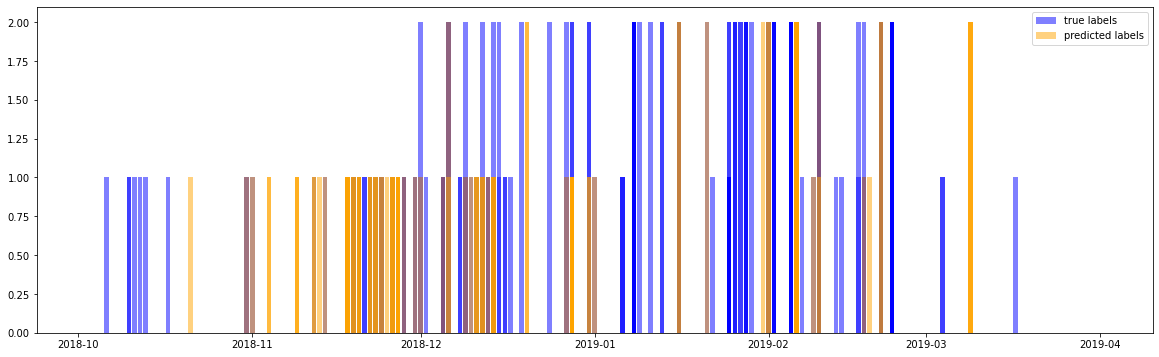

In [40]:
## get the train and predicted
results3 = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_3classes/figs/resultsTEST.csv')
## get the time-series information from metadata
labels = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/testLabels.csv')
meta3 = results3.merge(labels, left_on="filenames", right_on="File")
results3.head()
#labels.head()
meta3 = meta3[['filenames','trueLabels', 'predictedLabels','confidences0', 'confidences1', 'confidences2', 'Weather','Date','Time','Temperature','location']]

meta3['Date'] = pd.to_datetime(meta3['Date'])

plot = plt.figure(figsize=(20,6))
plt.bar(meta3['Date'], meta3['trueLabels'], color = "blue", label='true labels', alpha =0.5)
plt.bar(meta3['Date'], meta3['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.legend()

In [11]:
#rainSnowSubset = 

filenames  trueLabels  predictedLabels  confidences0  \
0    896_20181227 (51).JPG           1                1      0.176587   
1   874_20190111 (611).JPG           1                0      0.934764   
2  982_20181206 (4906).JPG           1                0      0.641815   
3     657_20190330 (8).JPG           1                1      0.147694   
4  1119_20190530 (420).JPG           1                0      0.988225   

   confidences1  confidences2 Weather       Date     Time  Temperature  \
0      0.686785      0.136628    Rain 2018-11-27  8:00:00        -17.0   
1      0.052105      0.013131    Rain 2018-12-28  8:00:00         -9.0   
2      0.303527      0.054658    Rain 2018-11-23  8:00:00        -12.0   
3      0.730113      0.122193    Rain 2018-11-30  8:00:00          1.0   
4      0.002584      0.009191    Rain 2019-01-22  8:00:00         -4.0   

   location  
0       896  
1       874  
2       982  
3       657  
4      1119

In [360]:
snowSegmentation= pd.read_csv('/Volumes/CatBreen/whitePixelIndexAI_test_resized_unet.csv')
snowSegmentation.head()
snowIndex = snowSegmentation.merge(labels, left_on="filename", right_on="File")
snowIndex['Date'] = pd.to_datetime(snowIndex['Date'])
subset = snowIndex[snowIndex['location'] == 1120]
subset = subset.sort_values(by=['Date'], ascending=True).reset_index()  
subset

index                 filename  whitePixelIndexAI_test_resized  \
0     1335    1120_20190723 (5).JPG                        0.821759   
1     2882    1120_20190723 (7).JPG                        0.366319   
2      382   1120_20190723 (10).JPG                        0.118779   
3     1678   1120_20190723 (11).JPG                        0.957321   
4     1215   1120_20190723 (27).JPG                        0.590567   
..     ...                      ...                             ...   
439   1134  1120_20190723 (761).JPG                        0.008681   
440   1587  1120_20190723 (762).JPG                        0.032263   
441    253  1120_20190723 (763).JPG                        0.032552   
442   1119  1120_20190723 (764).JPG                        0.013455   
443   2091  1120_20190723 (765).JPG                        0.003038   

     Unnamed: 0                     File Weather       Date      Time  \
0          2651    1120_20190723 (5).JPG     Fog 2018-11-14   8:00:00   
1          4712    1120_20190723 (7).JPG    None 2018-11-16   8:00:00   
2          3673   1120_20190723 (10).JPG    None 2018-11-16  17:06:07   
3         18395   1120_20190723 (11).JPG   Other 2018-11-17   8:00:00   
4          2645   1120_20190723 (27).JPG     Fog 2018-11-18   8:00:00   
..          ...                      ...     ...        ...       ...   
439        4752  1120_20190723 (761).JPG    None 2019-03-28   8:00:00   
440        4753  1120_20190723 (762).JPG    None 2019-03-29   8:00:00   
441        4754  1120_20190723 (763).JPG    None 2019-03-30   8:00:00   
442        4755  1120_20190723 (764).JPG    None 2019-03-31   8:00:00   
443        4756  1120_20190723 (765).JPG    None 2019-04-01   8:00:00   

     SnowCover  Temperature  location  
0          0.0          1.0      1120  
1          0.0          7.0      1120  
2          NaN          7.0      1120  
3          0.0          4.0      1120  
4          0.0         -2.0      1120  
..         ...          ...       ...  
439        1.0          0.0      1120  
440        1.0          6.0      1120  
441        1.0          5.0      1120  
442        1.0          0.0      1120  
443        1.0         -3.0      1120  

[444 rows x 11 columns]

In [361]:
subset1120 = meta[meta['location'] == 1120]

In [43]:
# sentinel= pd.read_csv('/Users/cmbreen/Documents/Chapter 1/sentinelPoint_snow_2015-2022.csv')
# sentinel.head()
# sentinel['time'] = [time.split('T')[0] for time in sentinel['imageId']]
# sentinel['time'] = pd.to_datetime(sentinel['time'])
# sentinel = sentinel[sentinel['mean']>=0].reset_index()
# sentinel = sentinel[(sentinel['time']>= '2018-10-01') & (sentinel['time'] <= '2019-04-01')]
# sentinelsubset = sentinel[sentinel['LokalitetID']==1120]
# sentinelsubset

In [362]:
## animals
animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")
animals.head()
animals['captured_at_exif'] = animals['captured_at_exif'].astype(str)
#animals['imageId']
animals['time'] = [time.split(' ')[0] for time in animals['captured_at_exif']]
animals['time'] = [time.replace(':',"-") for time in animals['time']]
animals['time'] = pd.to_datetime(animals['time'])
animals1120 = animals[animals['location_id'] == '1120']
animals1120 = animals1120[(animals1120['time'] > '2018-10-01') & (animals1120['time'] < '2019-04-01')]
animals1120 = animals1120[animals1120['validated_species'] != 'menneske']
animals1120 = animals1120[animals1120['validated_species'] != 'kjoeretoey']
animals1120 = animals1120[animals1120['validated_species'] != 'nothing'].reset_index()

/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/1512655394.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")


In [65]:
len(animals)
len(animals1120)
print(animals1120)

     index  Unnamed: 0  image_id location_id  timeserie_id  \
0   268287      268288   2865445        1120        440901   
1   268317      268318   2865663        1120        441030   
2   268335      268336   2865820        1120        440914   
3   268339      268340   2865881        1120        440900   
4   268345      268346   2865909        1120        441030   
5   268397      268398   2866278        1120        440985   
6   268404      268405   2866332        1120        440930   
7   268418      268419   2866435        1120        441030   
8   268422      268423   2866460        1120        440949   
9   268436      268437   2866543        1120        440899   
10  268459      268460   2866752        1120        441030   
11  268480      268481   2866873        1120        440663   

       captured_at_exif  num_animals validated_species       time  \
0   2018:11:16 17:06:05          1.0              hare 2018-11-16   
1   2019:01:08 05:38:55          2.0               ulv 

In [14]:
#len(wolf_presence)

In [363]:
wolf_presence = []
for item in animals1120['validated_species']:
    if item == 'ulv': wolf_presence.append(1)
    else: wolf_presence.append(np.nan)

hare_presence = []
for item in animals1120['validated_species']:
    if item == 'hare': hare_presence.append(1)
    else: hare_presence.append(np.nan)

animals1120['wolf_presence'] = wolf_presence
animals1120['hare_presence'] = hare_presence


In [364]:
animals1120['validated_species'].unique()

array(['hare', 'ulv'], dtype=object)

In [17]:
!pip install scipy

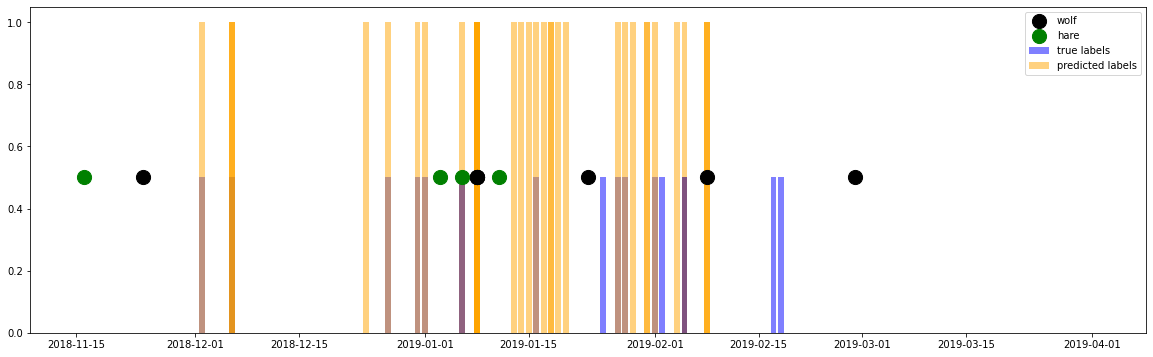

In [365]:
plot = plt.figure(figsize=(20,6))
plt.bar(subset1120['Date'], subset1120['trueLabels']*0.5, color = "blue", label='true labels', alpha =0.5)
plt.bar(subset1120['Date'], subset1120['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
#plt.plot(subset['Date'], subset['whitePixelIndexAI_test_resized'], label ="camera snow cover fraction")
#plt.plot(sentinelsubset['time'], sentinelsubset['mean'], label = 'sentinel')
plt.scatter(animals1120['time'], animals1120['wolf_presence']*0.5, label = 'wolf', color = 'black', s =200)
plt.scatter(animals1120['time'], animals1120['hare_presence']*0.5, label = 'hare', color = 'green', s = 200)
plt.legend()

In [48]:
snoq = glob.glob('/Volumes/CatBreen/CV4ecology/snoq/**/*')
olympex = glob.glob('/Volumes/CatBreen/CV4ecology/olympex/**/*')
scandcam = glob.glob('/Volumes/CatBreen/CV4ecology/scandcam/**/*')

all_paths = snoq+olympex+scandcam
all_files = [file.split('/')[-1] for file in all_paths]
paths = pd.DataFrame({'all_paths':all_paths,'all_files':all_files})
paths.head()

all_paths                all_files
0  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...  2014_12_02_12_00_00.jpg
1  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...  2014_10_18_13_01_00.jpg
2  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_10...  2014_10_22_12_00_00.jpg
3  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_11...  2014_11_27_13_01_00.jpg
4  /Volumes/CatBreen/CV4ecology/snoq/Rain/2014_12...  2014_12_11_08_00_00.jpg

In [49]:
subset1120

filenames  trueLabels  predictedLabels   confidences  \
22    1120_20190723 (320).JPG           1                0  1.714731e-01   
49    1120_20190723 (135).JPG           1                1  5.900901e-01   
50    1120_20190723 (238).JPG           1                1  9.951174e-01   
51    1120_20190723 (266).JPG           1                1  9.802449e-01   
52    1120_20190723 (321).JPG           1                1  7.210154e-01   
...                       ...         ...              ...           ...   
1455  1120_20190723 (761).JPG           0                0  2.106003e-04   
1456  1120_20190723 (763).JPG           0                0  2.996821e-04   
1457  1120_20190723 (764).JPG           0                0  4.993739e-04   
1458  1120_20190723 (765).JPG           0                0  9.760365e-05   
1459   1120_20190723 (91).JPG           0                0  6.218386e-08   

     Weather       Date      Time  Temperature  location  
22      Rain 2019-01-06  21:36:04         -4.0      1120  
49      Rain 2018-12-02   8:00:00          3.0      1120  
50      Rain 2018-12-27   8:00:00         -3.0      1120  
51      Rain 2019-01-01   8:00:00         -2.0      1120  
52      Rain 2019-01-06  21:36:05         -4.0      1120  
...      ...        ...       ...          ...       ...  
1455    None 2019-03-28   8:00:00          0.0      1120  
1456    None 2019-03-30   8:00:00          5.0      1120  
1457    None 2019-03-31   8:00:00          0.0      1120  
1458    None 2019-04-01   8:00:00         -3.0      1120  
1459    None 2018-11-22   8:00:00         -2.0      1120  

[422 rows x 9 columns]

In [50]:
subset1120_january = subset1120[(subset1120['Date'] >= '2019-01-12') & (subset1120['Date'] <= '2019-01-20')].sort_values(by=['Date'], ascending=True)
subset1120weather = subset1120_january[subset1120_january['predictedLabels']==1]
subset1120weather


filenames  trueLabels  predictedLabels  confidences  \
1185  1120_20190723 (368).JPG           0                1     0.650665   
487   1120_20190723 (375).JPG           0                1     0.901713   
1193  1120_20190723 (376).JPG           0                1     0.970857   
190   1120_20190723 (377).JPG           1                1     0.998698   
641   1120_20190723 (378).JPG           0                1     0.842773   
1247  1120_20190723 (409).JPG           0                1     0.561330   
1241  1120_20190723 (406).JPG           0                1     0.993977   
1271  1120_20190723 (425).JPG           0                1     0.693277   
540   1120_20190723 (438).JPG           0                1     0.991178   

     Weather       Date      Time  Temperature  location  
1185    None 2019-01-13   8:00:00         -5.0      1120  
487     None 2019-01-14   8:00:00        -10.0      1120  
1193    None 2019-01-15   8:00:00         -9.0      1120  
190     Snow 2019-01-16   8:00:00         -6.0      1120  
641     None 2019-01-17   8:00:00        -13.0      1120  
1247    None 2019-01-18  10:12:43        -15.0      1120  
1241    None 2019-01-18   8:00:00        -18.0      1120  
1271    None 2019-01-19   8:00:00        -11.0      1120  
540     None 2019-01-20   8:00:00        -13.0      1120

In [51]:
subset1120_wpaths = subset1120weather.merge(paths, left_on='filenames', right_on='all_files')
subset1120_wpaths

filenames  trueLabels  predictedLabels  confidences Weather  \
0  1120_20190723 (368).JPG           0                1     0.650665    None   
1  1120_20190723 (375).JPG           0                1     0.901713    None   
2  1120_20190723 (376).JPG           0                1     0.970857    None   
3  1120_20190723 (377).JPG           1                1     0.998698    Snow   
4  1120_20190723 (378).JPG           0                1     0.842773    None   
5  1120_20190723 (409).JPG           0                1     0.561330    None   
6  1120_20190723 (406).JPG           0                1     0.993977    None   
7  1120_20190723 (425).JPG           0                1     0.693277    None   
8  1120_20190723 (438).JPG           0                1     0.991178    None   

        Date      Time  Temperature  location  \
0 2019-01-13   8:00:00         -5.0      1120   
1 2019-01-14   8:00:00        -10.0      1120   
2 2019-01-15   8:00:00         -9.0      1120   
3 2019-01-16   8:00:00         -6.0      1120   
4 2019-01-17   8:00:00        -13.0      1120   
5 2019-01-18  10:12:43        -15.0      1120   
6 2019-01-18   8:00:00        -18.0      1120   
7 2019-01-19   8:00:00        -11.0      1120   
8 2019-01-20   8:00:00        -13.0      1120   

                                           all_paths                all_files  
0  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (368).JPG  
1  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (375).JPG  
2  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (376).JPG  
3  /Volumes/CatBreen/CV4ecology/scandcam/Snow/112...  1120_20190723 (377).JPG  
4  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (378).JPG  
5  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (409).JPG  
6  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (406).JPG  
7  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (425).JPG  
8  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (438).JPG

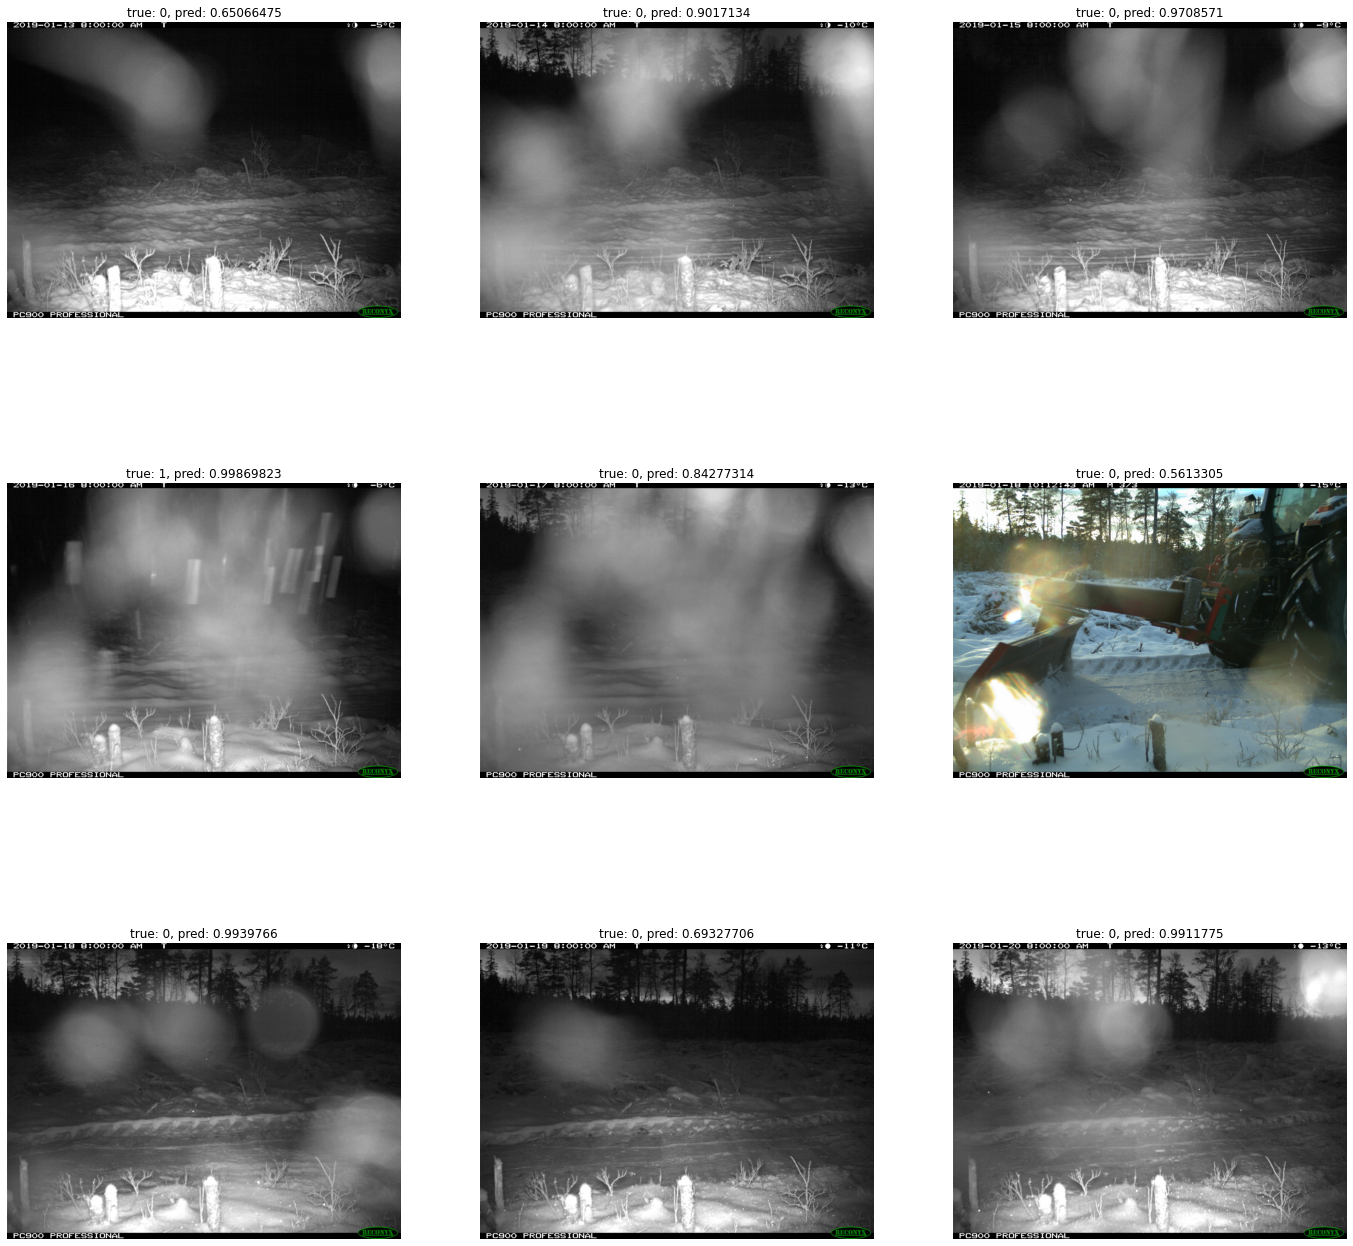

In [52]:
#mismatch['index'][0]
fig, axs = plt.subplots(3, 3, figsize=(24, 24))
rows = 3
cols = 3
idx = 0
for row in range(rows):
    for col in range(cols):
        im = Image.open(subset1120_wpaths['all_paths'][idx])
        axs[row, col].imshow(im)
        axs[row, col].axis('off')
        axs[row,col].title.set_text('true: ' + str(subset1120_wpaths['trueLabels'][idx]) + ', pred: ' + str(subset1120_wpaths['confidences'][idx]))
        idx += 1



                    filenames  trueLabels  predictedLabels  confidences  \
49    1120_20190723 (135).JPG           1                1     0.590090   
1169  1120_20190723 (136).JPG           0                0     0.036054   
176   1120_20190723 (176).JPG           1                1     0.871160   
210   1120_20190723 (177).JPG           1                1     0.996972   
211   1120_20190723 (178).JPG           1                1     0.968834   
1194  1120_20190723 (207).JPG           0                0     0.000045   

     Weather       Date      Time  Temperature  location  
49      Rain 2018-12-02   8:00:00          3.0      1120  
1169    None 2018-12-03   8:00:00          5.0      1120  
176     Snow 2018-12-06  23:09:24         -1.0      1120  
210     Snow 2018-12-06  23:09:25         -1.0      1120  
211     Snow 2018-12-06  23:09:26         -1.0      1120  
1194    None 2018-12-08   8:00:00         -1.0      1120  


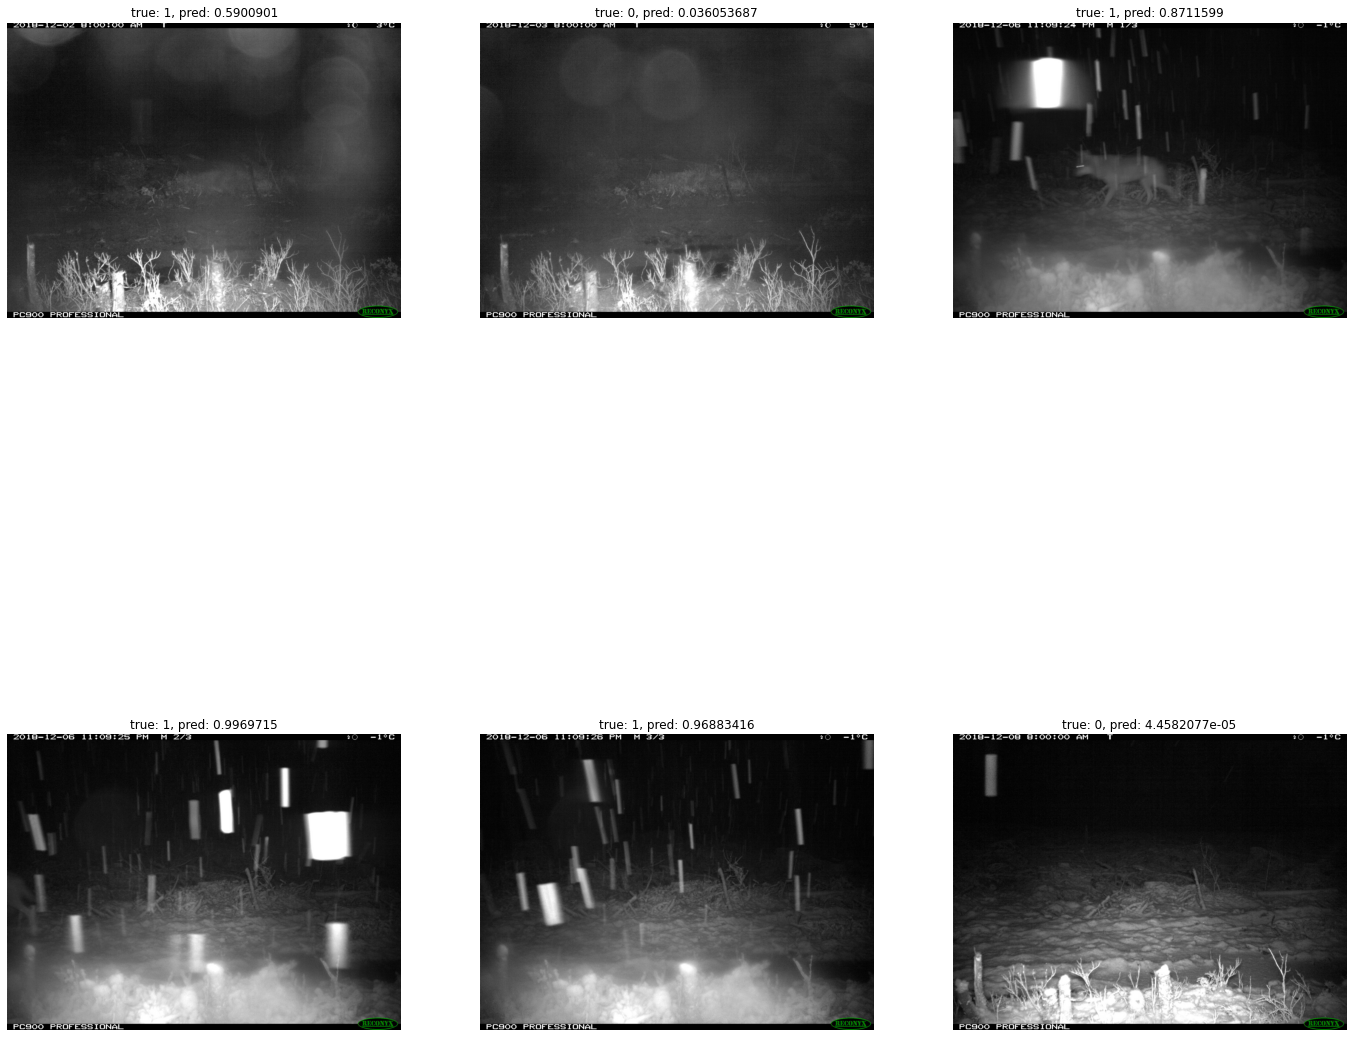

In [64]:
## 
subset1120_december = subset1120[(subset1120['Date'] >= '2018-12-01') & (subset1120['Date'] <= '2018-12-10')].sort_values(by=['Date'], ascending=True)
#subset1120weather = subset1120[subset1120['predictedLabels']==1]
#subset1120weather
print(subset1120_december)

subset1120_december_paths = subset1120_december.merge(paths, left_on='filenames', right_on='all_files')
#subset1120_december_paths = subset1120_december_paths.drop([4]).reset_index()
 ## drop row 5
subset1120_december_paths

#mismatch['index'][0]
fig, axs = plt.subplots(2, 3, figsize=(24, 24))
rows = 2
cols = 3
idx = 0
for row in range(rows):
    for col in range(cols):
        im = Image.open(subset1120_december_paths['all_paths'][idx])
        axs[row, col].imshow(im)
        axs[row, col].axis('off')
        axs[row,col].title.set_text('true: ' + str(subset1120_december_paths['trueLabels'][idx]) + ', pred: ' + str(subset1120_december_paths['confidences'][idx]))
        idx += 1


In [54]:
subset1120_february = subset1120[(subset1120['Date'] >= '2019-02-13') & (subset1120['Date'] <= '2019-02-22')].sort_values(by=['Date'], ascending=True)
#subset1120weather = subset1120[subset1120['predictedLabels']==1]
#subset1120weather
subset1120_february = subset1120_february[-11:-1]

subset1120_february_paths = subset1120_february.merge(paths, left_on='filenames', right_on='all_files')
subset1120_february_paths = subset1120_february_paths.drop([4]).reset_index()
 ## drop row 5
subset1120_february_paths

index                filenames  trueLabels  predictedLabels  confidences  \
0      0  1120_20190723 (626).JPG           0                0     0.000413   
1      1  1120_20190723 (616).JPG           0                0     0.010848   
2      2  1120_20190723 (630).JPG           0                0     0.000253   
3      3  1120_20190723 (623).JPG           0                0     0.000125   
4      5  1120_20190723 (634).JPG           1                0     0.000008   
5      6  1120_20190723 (635).JPG           1                0     0.000270   
6      7  1120_20190723 (636).JPG           0                0     0.000137   
7      8  1120_20190723 (637).JPG           0                0     0.000013   
8      9  1120_20190723 (638).JPG           0                0     0.000042   

  Weather       Date      Time  Temperature  location  \
0    None 2019-02-13  12:54:04         19.0      1120   
1    None 2019-02-13  11:22:29         14.0      1120   
2    None 2019-02-13  12:54:08         19.0      1120   
3    None 2019-02-13  12:54:01         19.0      1120   
4    Rain 2019-02-17   8:00:00          1.0      1120   
5    Rain 2019-02-18   8:00:00          4.0      1120   
6    None 2019-02-19   8:00:00          3.0      1120   
7    None 2019-02-20   8:00:00         -6.0      1120   
8    None 2019-02-21   8:00:00         -1.0      1120   

                                           all_paths                all_files  
0  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (626).JPG  
1  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (616).JPG  
2  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (630).JPG  
3  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (623).JPG  
4  /Volumes/CatBreen/CV4ecology/scandcam/Rain/112...  1120_20190723 (634).JPG  
5  /Volumes/CatBreen/CV4ecology/scandcam/Rain/112...  1120_20190723 (635).JPG  
6  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (636).JPG  
7  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (637).JPG  
8  /Volumes/CatBreen/CV4ecology/scandcam/None/112...  1120_20190723 (638).JPG

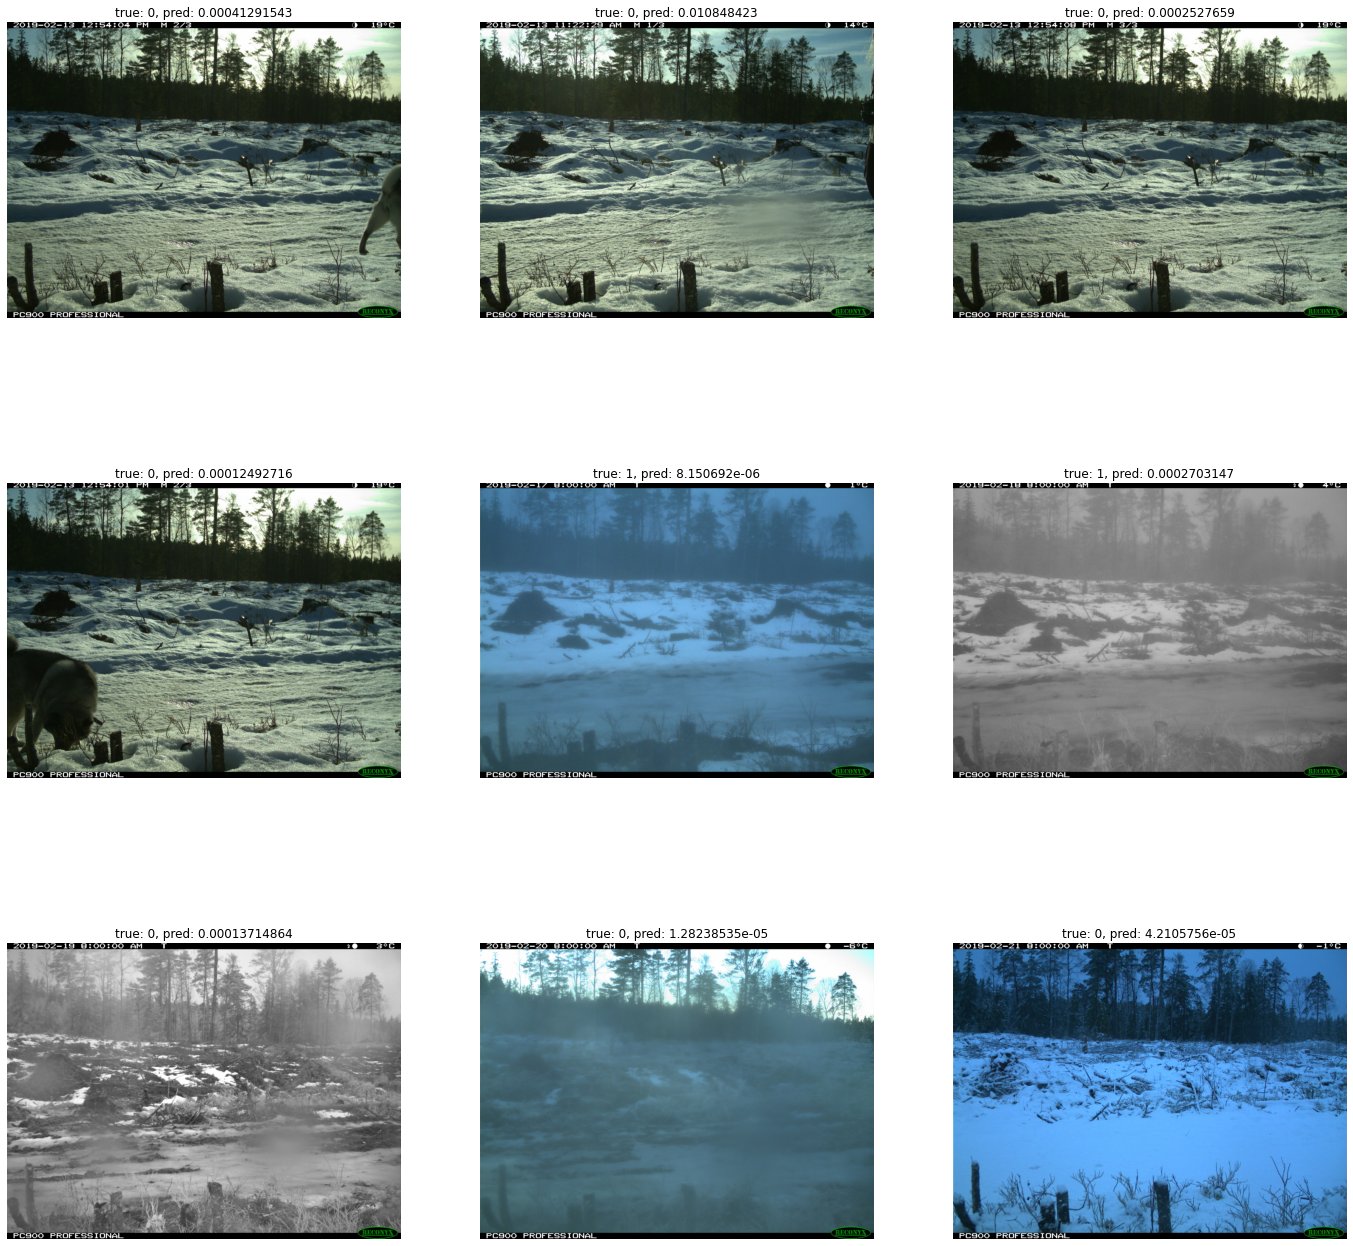

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(24, 24))
rows = 3
cols = 3
idx = 0
for row in range(rows):
    for col in range(cols):
        im = Image.open(subset1120_february_paths['all_paths'][idx])
        axs[row, col].imshow(im)
        axs[row, col].axis('off')
        axs[row,col].title.set_text('true: ' + str(subset1120_february_paths['trueLabels'][idx]) + ', pred: ' + str(subset1120_february_paths['confidences'][idx]))
        idx += 1

In [66]:
results3 = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_3classes/figs/resultsTEST.csv')## 68 files that are rain that are NOT rain
results3 = results3[['filenames', 'trueLabels','predictedLabels', 'confidences0', 'confidences1', 'confidences2']]
meta3 = results3.merge(labels, left_on="filenames", right_on="File")
results3.head()
#labels.head()
meta3 = meta3[['filenames','trueLabels', 'predictedLabels','confidences0', 'confidences1','confidences2','Weather','Date','Time','Temperature','location']]
meta3
meta3['Date'] = pd.to_datetime(meta3['Date'])

In [67]:
subset1120_3 = meta3[meta3['location'] == 1120]


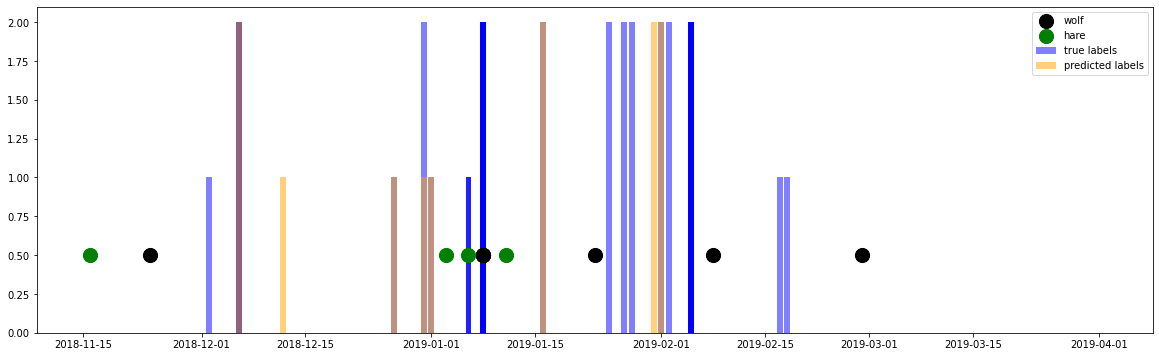

In [68]:
plot = plt.figure(figsize=(20,6))
plt.bar(subset1120_3['Date'], subset1120_3['trueLabels'], color = "blue", label='true labels', alpha =0.5)
plt.bar(subset1120_3['Date'], subset1120_3['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.scatter(animals1120['time'], animals1120['wolf_presence']*0.5, label = 'wolf', color = 'black', s =200)
plt.scatter(animals1120['time'], animals1120['hare_presence']*0.5, label = 'hare', color = 'green', s = 200)
#plt.plot(subset['Date'], subset['whitePixelIndexAI_test_resized'])
plt.legend()

# TRONDELAG ANALYSIS FOR 2018-2019

In [80]:
camerasTrondelag = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/AllScandCamcameras_CopyFeatures1_TableToExcel.csv', encoding_errors='ignore')
cameras = camerasTrondelag['LokalitetID'].values.tolist()
print(len(cameras))


97
[502, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 537, 538, 555, 556, 557, 558, 559, 570, 571, 572, 574, 575, 576, 577, 583, 584, 585, 586, 641, 642, 643, 644, 645, 646, 647, 657, 709, 710, 711, 712, 713, 714, 722, 723, 724, 729, 730, 731, 732, 733, 734, 735, 736, 738, 739, 751, 752, 753, 755, 756, 757, 759, 760, 766, 813, 814, 857, 858, 859, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 896, 897, 918, 929, 930, 937, 960, 961, 962, 966, 967, 968, 975, 976, 979, 982, 1100, 1101, 1107, 1123, 1124, 1201, 1262, 1263, 1344, 1687, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,

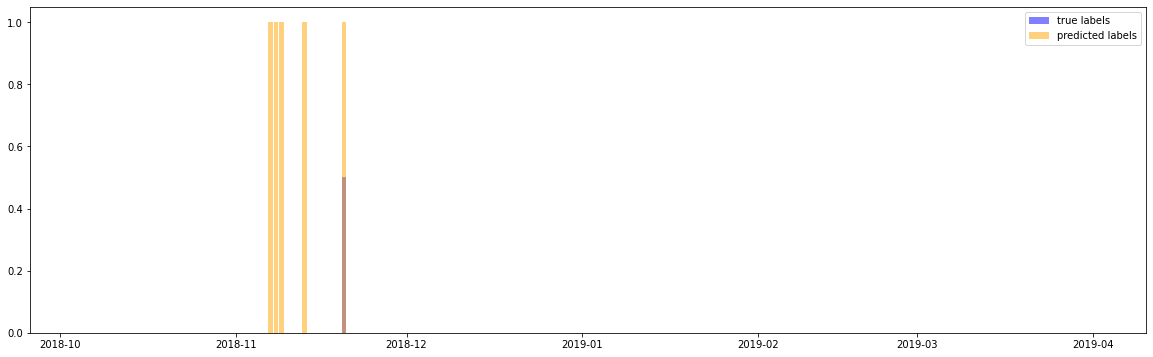

In [72]:
## get the train and predicted
results2 = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_2classes_None/resultsTEST.csv')
## get the time-series information from metadata
labels = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/testLabels.csv')
meta = results2.merge(labels, left_on="filenames", right_on="File")
results2.head()
#labels.head()
meta = meta[['filenames','trueLabels', 'predictedLabels','confidences','Weather','Date','Time','Temperature','location']]

meta['Date'] = pd.to_datetime(meta['Date'])
metaTrondelag = meta.loc[meta['location'].isin(cameras)]
plot = plt.figure(figsize=(20,6))
plt.bar(metaTrondelag['Date'], metaTrondelag['trueLabels']*0.5, color = "blue", label='true labels', alpha =0.5)
plt.bar(metaTrondelag['Date'], metaTrondelag['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.legend()

In [73]:
## animals
animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")
#print(animals.head())
animals['captured_at_exif'] = animals['captured_at_exif'].astype(str)
#animals['imageId']
animals['time'] = [time.split(' ')[0] for time in animals['captured_at_exif']]
animals['time'] = [time.replace(':',"-") for time in animals['time']]
animals['time'] = pd.to_datetime(animals['time'])
animalsTrondelag = animals.loc[animals['location_id'].isin(cameras)]
animalsTrondelag = animals[(animals['time'] > '2018-10-01') & (animals['time'] < '2019-04-01')]
animalsTrondelag = animalsTrondelag.drop_duplicates(subset=['timeserie_id'])
animalsTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] != 'menneske']
animalsTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] != 'kjoeretoey']
animalsTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] != 'nothing'].reset_index()
animalsTrondelag.head()
#print(animalsTrondelag['validated_species'].unique())

/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/2588873949.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")


index  Unnamed: 0  image_id location_id  timeserie_id     captured_at_exif  \
0  50808       50809    570726         649         90026  2018:10:07 10:35:13   
1  50813       50814    570750         649         89983  2018:10:02 06:15:22   
2  50830       50831    570868         649         90055  2018:10:03 03:48:03   
3  50842       50843    570994         649         89999  2018:10:12 22:21:20   
4  52228       52229    582276         905         91247  2018:10:11 13:26:04   

   num_animals validated_species       time  
0          1.0            raadyr 2018-10-07  
1          1.0            raadyr 2018-10-02  
2          1.0            raadyr 2018-10-03  
3          1.0          grevling 2018-10-12  
4          2.0               elg 2018-10-11

In [74]:
animalsTrondelag["validated_species"].value_counts()

raadyr            4972
rev               4138
hjort             2397
grevling          2084
hare              1619
elg               1117
ukjent             745
fugl               531
katt               494
villsvin           328
ekorn              321
gaupe              286
hund               277
maar               139
ulv                 68
sykkel              61
rein                52
jerv                44
rugde               41
smagnagere          40
sau                 36
ku                  34
skogshons           29
motorsykkel         23
hest                22
andre_pattedyr      18
andre_maardyr       18
daahjort            12
oter                 1
ilder                1
Name: validated_species, dtype: int64

(array([8173., 2996., 6043.,  849.,  815.,  434.,  408.,  110.,  106.,
          14.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

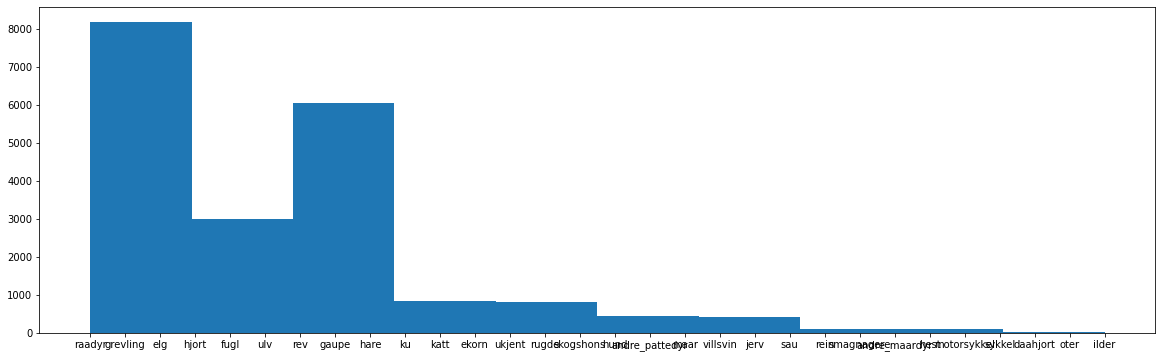

In [ ]:
plot = plt.figure(figsize=(20,6))
plt.hist(animalsTrondelag['validated_species'])


In [75]:
### 
roeDeerTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'raadyr']
mooseTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'elg']
redDeerTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'hjort']
wolfTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'ulv']
foxTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'rev']
lynxTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'gaupe']
wolverineTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'jerv']
badgerTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'grevling']
reindeerTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'rein']
wildboarTrondelag = animalsTrondelag[animalsTrondelag['validated_species'] == 'villsvin']



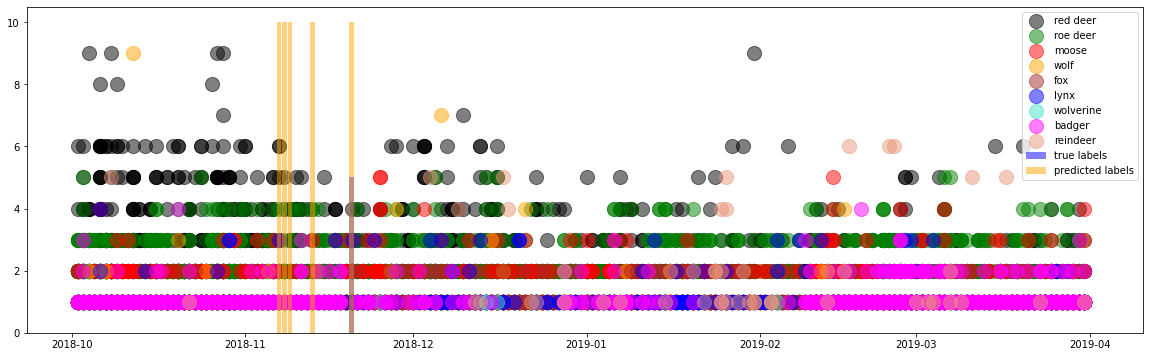

In [76]:
plot = plt.figure(figsize=(20,6))
#plt.bar(subset1120_3['Date'], subset1120_3['trueLabels'], color = "blue", label='true labels', alpha =0.5)
#plt.bar(subset1120_3['Date'], subset1120_3['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.scatter(redDeerTrondelag['time'], redDeerTrondelag['num_animals'], label = 'red deer', color = 'black', s =200, alpha = 0.5)
plt.scatter(roeDeerTrondelag['time'], roeDeerTrondelag['num_animals'], label = 'roe deer', color = 'green', s =200, alpha = 0.5)
plt.scatter(mooseTrondelag['time'], mooseTrondelag['num_animals'], label = 'moose', color = 'red', s =200, alpha = 0.5)
plt.scatter(wolfTrondelag['time'], wolfTrondelag['num_animals'], label = 'wolf', color = 'orange', s =200, alpha = 0.5)
plt.scatter(foxTrondelag['time'], foxTrondelag['num_animals'], label = 'fox', color = 'brown', s =200, alpha = 0.5)
plt.scatter(lynxTrondelag['time'], lynxTrondelag['num_animals'], label = 'lynx', color = 'blue', s =200, alpha = 0.5)
plt.scatter(wolverineTrondelag['time'], wolverineTrondelag['num_animals'], label = 'wolverine', color = 'turquoise', s =200, alpha = 0.5)
plt.scatter(badgerTrondelag['time'], badgerTrondelag['num_animals'], label = 'badger', color = 'fuchsia', s =200, alpha = 0.5)
plt.scatter(reindeerTrondelag['time'], reindeerTrondelag['num_animals'], label = 'reindeer', color = 'darksalmon', s =200, alpha = 0.5)
plt.bar(metaTrondelag['Date'], metaTrondelag['trueLabels']*5, color = "blue", label='true labels', alpha =0.5)
plt.bar(metaTrondelag['Date'], metaTrondelag['predictedLabels']*10, color ="orange" , label= 'predicted labels', alpha=0.5)
plt.legend()
plt.legend()

In [77]:
metaTrondelag['location'].unique()

array([ 689,  938,  625,  622,  593,  963,  596, 1106,  957,  964,  965,
        610,  611,  615,  616,  617,  618,  621,  595,  598,  600,  603,
        591,  592,  594,  679,  682,  683,  684,  690,  745,  747,  869,
        743,  744,  740,  749,  750,  868])

# INLANDET ANALYSIS

In [448]:
camerasInlandet = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/All ScandCam cameras_inlandet_TableToExcel2.csv', encoding_errors='ignore')
camerasInlandet = camerasInlandet['LokalitetID'].values.tolist()
print(camerasInlandet)

[502, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 537, 538, 555, 556, 557, 558, 559, 570, 571, 572, 574, 575, 576, 577, 583, 584, 585, 586, 641, 642, 643, 644, 645, 646, 647, 657, 709, 710, 711, 712, 713, 714, 722, 723, 724, 729, 730, 731, 732, 733, 734, 735, 736, 738, 739, 751, 752, 753, 755, 756, 757, 759, 760, 766, 813, 814, 857, 858, 859, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 896, 897, 918, 929, 930, 937, 960, 961, 962, 966, 967, 968, 975, 976, 979, 982, 1100, 1101, 1107, 1123, 1124, 1201, 1262, 1263, 1344, 1687, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19

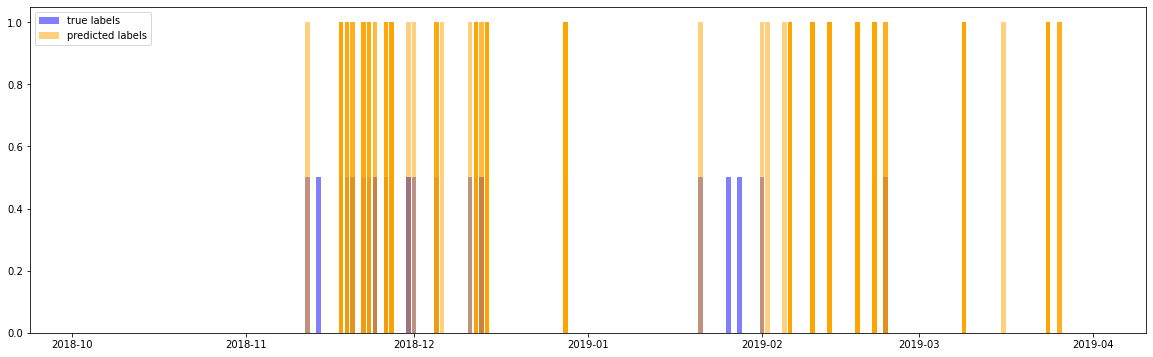

In [449]:
## get the train and predicted
results2 = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/exp_resnet50_2classes_None/resultsTEST.csv')
## get the time-series information from metadata
labels = pd.read_csv('/Users/catherinebreen/Documents/Chapter 1/CV4EcologyData/results/testLabels.csv')
meta = results2.merge(labels, left_on="filenames", right_on="File")
results2.head()
#labels.head()
meta = meta[['filenames','trueLabels', 'predictedLabels','confidences','Weather','Date','Time','Temperature','location']]

meta['Date'] = pd.to_datetime(meta['Date'])
metaInlandet = meta.loc[meta['location'].isin(camerasInlandet)]
plot = plt.figure(figsize=(20,6))
plt.bar(metaInlandet['Date'], metaInlandet['trueLabels']*0.5, color = "blue", label='true labels', alpha =0.5)
plt.bar(metaInlandet['Date'], metaInlandet['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.legend()

In [450]:
## animals
animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")
#print(animals.head())
animals['captured_at_exif'] = animals['captured_at_exif'].astype(str)
#animals['imageId']
animals['time'] = [time.split(' ')[0] for time in animals['captured_at_exif']]
animals['time'] = [time.replace(':',"-") for time in animals['time']]
animals['time'] = pd.to_datetime(animals['time'])
animals['hour'] = [time.split(' ')[-1] for time in animals['captured_at_exif']]

animalsInlandet = animals.loc[animals['location_id'].isin(camerasInlandet)]
animalsInlandet = animals[(animals['time'] > '2018-10-01') & (animals['time'] < '2019-04-01')]
animalsInlandet = animalsInlandet.drop_duplicates(subset=['timeserie_id'])
animalsInlandet = animalsInlandet[animalsInlandet['validated_species'] != 'menneske']
animalsInlandet = animalsInlandet[animalsInlandet['validated_species'] != 'kjoeretoey']
animalsInlandet = animalsInlandet[animalsInlandet['validated_species'] != 'nothing'].reset_index()
print(animalsInlandet.head())
print(len(animalsInlandet))

#print(animalsTrondelag['validated_species'].unique())

/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/3197286811.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  animals = pd.read_csv("~/Documents/Chapter 3/images_20220217.csv")


   index  Unnamed: 0  image_id location_id  timeserie_id     captured_at_exif  \
0  50808       50809    570726         649         90026  2018:10:07 10:35:13   
1  50813       50814    570750         649         89983  2018:10:02 06:15:22   
2  50830       50831    570868         649         90055  2018:10:03 03:48:03   
3  50842       50843    570994         649         89999  2018:10:12 22:21:20   
4  52228       52229    582276         905         91247  2018:10:11 13:26:04   

   num_animals validated_species       time      hour  
0          1.0            raadyr 2018-10-07  10:35:13  
1          1.0            raadyr 2018-10-02  06:15:22  
2          1.0            raadyr 2018-10-03  03:48:03  
3          1.0          grevling 2018-10-12  22:21:20  
4          2.0               elg 2018-10-11  13:26:04  
19948


In [451]:
### 
roeDeerInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'raadyr']
mooseInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'elg']
redDeerInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'hjort']
wolfInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'ulv']
foxInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'rev']
lynxInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'gaupe']
wolverineInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'jerv']
badgerInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'grevling']
reindeerInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'rein']
wildboarInlandet = animalsInlandet[animalsInlandet['validated_species'] == 'villsvin']

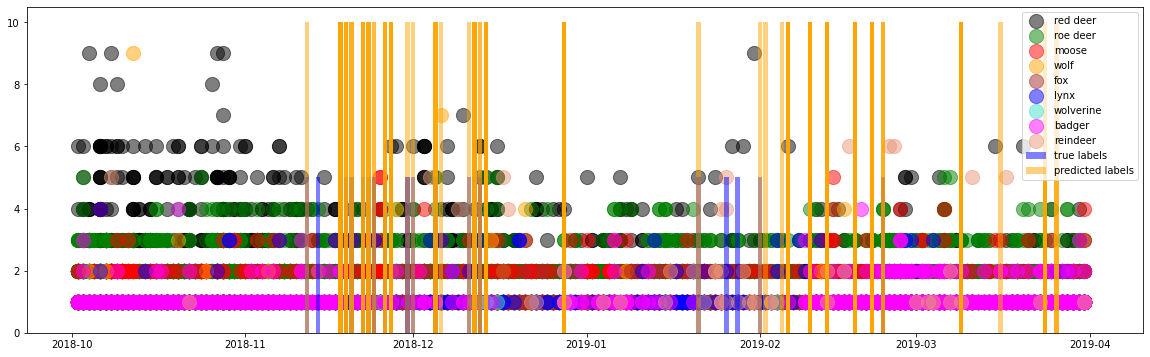

In [452]:
plot = plt.figure(figsize=(20,6))
#plt.bar(subset1120_3['Date'], subset1120_3['trueLabels'], color = "blue", label='true labels', alpha =0.5)
#plt.bar(subset1120_3['Date'], subset1120_3['predictedLabels'], color ="orange" , label= 'predicted labels', alpha=0.5)
plt.scatter(redDeerInlandet['time'], redDeerInlandet['num_animals'], label = 'red deer', color = 'black', s =200, alpha = 0.5)
plt.scatter(roeDeerInlandet['time'], roeDeerInlandet['num_animals'], label = 'roe deer', color = 'green', s =200, alpha = 0.5)
plt.scatter(mooseInlandet['time'], mooseInlandet['num_animals'], label = 'moose', color = 'red', s =200, alpha = 0.5)
plt.scatter(wolfInlandet['time'], wolfInlandet['num_animals'], label = 'wolf', color = 'orange', s =200, alpha = 0.5)
plt.scatter(foxInlandet['time'], foxInlandet['num_animals'], label = 'fox', color = 'brown', s =200, alpha = 0.5)
plt.scatter(lynxInlandet['time'], lynxInlandet['num_animals'], label = 'lynx', color = 'blue', s =200, alpha = 0.5)
plt.scatter(wolverineInlandet['time'], wolverineInlandet['num_animals'], label = 'wolverine', color = 'turquoise', s =200, alpha = 0.5)
plt.scatter(badgerInlandet['time'], badgerInlandet['num_animals'], label = 'badger', color = 'fuchsia', s =200, alpha = 0.5)
plt.scatter(reindeerInlandet['time'], reindeerInlandet['num_animals'], label = 'reindeer', color = 'darksalmon', s =200, alpha = 0.5)
plt.bar(metaInlandet['Date'], metaInlandet['trueLabels']*5, color = "blue", label='true labels', alpha =0.5)
plt.bar(metaInlandet['Date'], metaInlandet['predictedLabels']*10, color ="orange" , label= 'predicted labels', alpha=0.5)
plt.legend()
plt.legend()

In [453]:
## adding a variable of hours since weather event 
#print(animalsInlandet.head())
metaInlandet['Date_string'] = [str(item).split(' ')[0] for item in metaInlandet['Date']]
metaInlandet['full_time'] = [(metaInlandet.loc[index]['Date_string'] + str(' ') + metaInlandet.loc[index]['Time']) for index in metaInlandet.index]
metaInlandet


/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/2086552568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metaInlandet['Date_string'] = [str(item).split(' ')[0] for item in metaInlandet['Date']]
/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/2086552568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metaInlandet['full_time'] = [(metaInlandet.loc[index]['Date_string'] + str(' ') + metaInlandet.loc[index]['Time']) for index in metaInlandet.index]


filenames  trueLabels  predictedLabels  confidences  \
0       896_20181227 (51).JPG           1                1     0.918138   
1      874_20190111 (611).JPG           1                0     0.094495   
2     982_20181206 (4906).JPG           1                1     0.584488   
3        657_20190330 (8).JPG           1                1     0.999630   
10       896_20190120 (1).JPG           1                0     0.487592   
...                       ...         ...              ...          ...   
3307    897_20190122 (70).JPG           0                0     0.122030   
3308    873_20181201 (80).JPG           0                0     0.177025   
3309    897_20190122 (87).JPG           0                0     0.059916   
3311   874_20181023 (616).JPG           0                0     0.002557   
3313    875_20181023 (64).JPG           0                0     0.000001   

     Weather       Date     Time  Temperature  location Date_string  \
0       Rain 2018-11-27  8:00:00        -17.0       896  2018-11-27   
1       Rain 2018-12-28  8:00:00         -9.0       874  2018-12-28   
2       Rain 2018-11-23  8:00:00        -12.0       982  2018-11-23   
3       Rain 2018-11-30  8:00:00          1.0       657  2018-11-30   
10      Rain 2018-12-28  8:00:00        -15.0       896  2018-12-28   
...      ...        ...      ...          ...       ...         ...   
3307    None 2018-12-14  8:00:00        -13.0       897  2018-12-14   
3308    None 2018-11-23  8:00:00        -14.0       873  2018-11-23   
3309    None 2018-12-28  8:00:00         -6.0       897  2018-12-28   
3311    None 2018-10-21  7:27:39          3.0       874  2018-10-21   
3313    None 2018-10-21  8:00:00          4.0       875  2018-10-21   

               full_time  
0     2018-11-27 8:00:00  
1     2018-12-28 8:00:00  
2     2018-11-23 8:00:00  
3     2018-11-30 8:00:00  
10    2018-12-28 8:00:00  
...                  ...  
3307  2018-12-14 8:00:00  
3308  2018-11-23 8:00:00  
3309  2018-12-28 8:00:00  
3311  2018-10-21 7:27:39  
3313  2018-10-21 8:00:00  

[952 rows x 11 columns]

## adjusting confidences for weather

In [454]:
metaInlandet['weather_25'] = [1 if item > 0.25 else 0 for item in metaInlandet['confidences']]
metaInlandet['weather_50'] = [1 if item > 0.50 else 0 for item in metaInlandet['confidences']]
metaInlandet['weather_75'] = [1 if item > 0.75 else 0 for item in metaInlandet['confidences']]
metaInlandet


/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/1118253814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metaInlandet['weather_25'] = [1 if item > 0.25 else 0 for item in metaInlandet['confidences']]
/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/1118253814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metaInlandet['weather_50'] = [1 if item > 0.50 else 0 for item in metaInlandet['confidences']]
/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_23562/1

filenames  trueLabels  predictedLabels  confidences  \
0       896_20181227 (51).JPG           1                1     0.918138   
1      874_20190111 (611).JPG           1                0     0.094495   
2     982_20181206 (4906).JPG           1                1     0.584488   
3        657_20190330 (8).JPG           1                1     0.999630   
10       896_20190120 (1).JPG           1                0     0.487592   
...                       ...         ...              ...          ...   
3307    897_20190122 (70).JPG           0                0     0.122030   
3308    873_20181201 (80).JPG           0                0     0.177025   
3309    897_20190122 (87).JPG           0                0     0.059916   
3311   874_20181023 (616).JPG           0                0     0.002557   
3313    875_20181023 (64).JPG           0                0     0.000001   

     Weather       Date     Time  Temperature  location Date_string  \
0       Rain 2018-11-27  8:00:00        -17.0       896  2018-11-27   
1       Rain 2018-12-28  8:00:00         -9.0       874  2018-12-28   
2       Rain 2018-11-23  8:00:00        -12.0       982  2018-11-23   
3       Rain 2018-11-30  8:00:00          1.0       657  2018-11-30   
10      Rain 2018-12-28  8:00:00        -15.0       896  2018-12-28   
...      ...        ...      ...          ...       ...         ...   
3307    None 2018-12-14  8:00:00        -13.0       897  2018-12-14   
3308    None 2018-11-23  8:00:00        -14.0       873  2018-11-23   
3309    None 2018-12-28  8:00:00         -6.0       897  2018-12-28   
3311    None 2018-10-21  7:27:39          3.0       874  2018-10-21   
3313    None 2018-10-21  8:00:00          4.0       875  2018-10-21   

               full_time  weather_25  weather_50  weather_75  
0     2018-11-27 8:00:00           1           1           1  
1     2018-12-28 8:00:00           0           0           0  
2     2018-11-23 8:00:00           1           1           0  
3     2018-11-30 8:00:00           1           1           1  
10    2018-12-28 8:00:00           1           0           0  
...                  ...         ...         ...         ...  
3307  2018-12-14 8:00:00           0           0           0  
3308  2018-11-23 8:00:00           0           0           0  
3309  2018-12-28 8:00:00           0           0           0  
3311  2018-10-21 7:27:39           0           0           0  
3313  2018-10-21 8:00:00           0           0           0  

[952 rows x 14 columns]